In [1]:
import sys
print(sys.executable)

 # This should print the installed OpenCV version


C:\Users\Vinay\AppData\Local\Programs\Python\Python312\python.exe


In [2]:
import cv2
import matplotlib.pyplot as plt

# Open the video file
video = cv2.VideoCapture('03.avi')

# Read the first frame
success, frame = video.read()

if success:
    # Convert BGR (OpenCV format) to RGB (Matplotlib format)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame
    plt.imshow(frame)
    plt.axis('off')
    plt.show()
else:
    print("Error: Could not read the video file.")


Error: Could not read the video file.


# Greyscaling


Processing 01.avi...


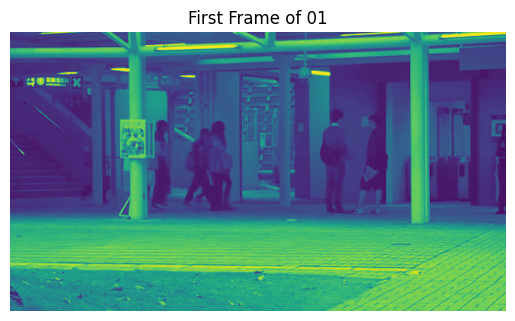

Processing 02.avi...


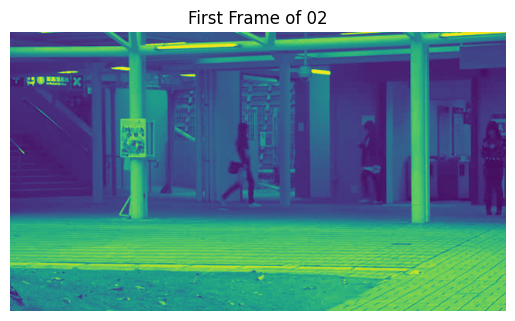

Processing 03.avi...


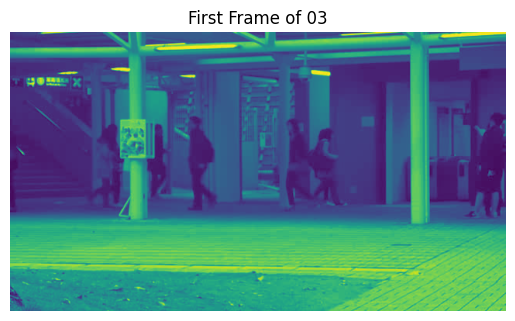

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Path to the folder containing videos
video_folder = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos" 
output_folder = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_frames_bw"

# Ensure the output folder exists
os.makedirs(output_folder, exist_ok=True)

# Get all video files in the folder
video_files = [f for f in os.listdir(video_folder) if f.endswith(".avi")]

# Process each video
for video_file in video_files:
    video_path = os.path.join(video_folder, video_file)
    video_name = os.path.splitext(video_file)[0]  # Remove .avi extension
    
    # Create a folder for each video's frames
    frame_output_folder = os.path.join(output_folder, video_name)
    os.makedirs(frame_output_folder, exist_ok=True)
    
    print(f"Processing {video_file}...")

    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    frame_count = 0
    success, frame = video.read()
    
    while success:
        # Convert BGR to RGB for visualization
        #rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        
        # Save the frame as an image file
        frame_filename = os.path.join(frame_output_folder, f"frame_{frame_count:04d}.png")
        cv2.imwrite(frame_filename, gray_frame)
        
        # Show the first frame only
        if frame_count == 0:
            plt.imshow(gray_frame)
            plt.axis("off")
            plt.title(f"First Frame of {video_name}")
            plt.show()
        
        frame_count += 1
        success, frame = video.read()
    
    video.release()
   # print(f"✅ {frame_count} frames extracted from {video_file}!")

print("🎉 All videos processed successfully!")


# Gaussian  Blur

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

input_root = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_frames_bw"
output_root = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_gaussianblur"

os.makedirs(output_root, exist_ok=True)

# Loop through each subfolder (01, 02, ..., 16)
for folder_name in sorted(os.listdir(input_root)):
    input_folder = os.path.join(input_root, folder_name)
    output_folder = os.path.join(output_root, folder_name)
    
    if os.path.isdir(input_folder):
        os.makedirs(output_folder, exist_ok=True)

        print(f"\nProcessing folder: {folder_name}")
        
        for filename in sorted(os.listdir(input_folder)):
            if filename.endswith(".png"):
                input_path = os.path.join(input_folder, filename)

                # Read the image in grayscale
                gray_img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

                # Apply Gaussian Blur
                blurred_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

                # Save the blurred image
                output_path = os.path.join(output_folder, filename)
                cv2.imwrite(output_path, blurred_img)

                # Display the first image from each folder for verification
                """
                if filename == "frame_0001.png":
                    plt.imshow(blurred_img, cmap='gray')
                    plt.title(f"Blurred Frame: {folder_name}/{filename}")
                    plt.axis('off')
                    plt.show()
                """

print("\n✅ All blurred frames saved successfully!")



Processing folder: 01

Processing folder: 02


# ORIGINAL vs AFTER GAUSSIAN BLUR

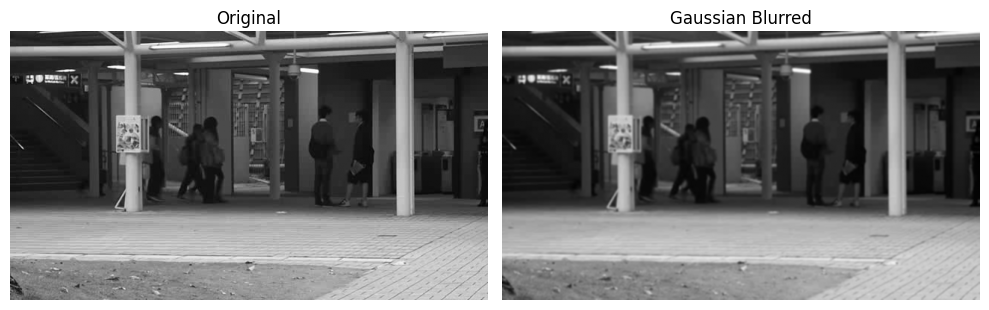

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load a grayscale image
img_path = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_frames_bw\01\frame_0000.png"
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Plot original vs blurred
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred, cmap='gray')
plt.title("Gaussian Blurred")
plt.axis('off')

plt.tight_layout()
plt.show()


# Bilateral Filter

In [ ]:
import cv2
import os

# Input folder (grayscale images)
input_folder = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_frames_bw"

# Output folder to store bilateral filtered images
output_folder = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_bilateral"
os.makedirs(output_folder, exist_ok=True)

# Traverse all subfolders (e.g., 01, 02, ..., 16)
for subfolder in sorted(os.listdir(input_folder)):
    subfolder_path = os.path.join(input_folder, subfolder)
    output_subfolder_path = os.path.join(output_folder, subfolder)
    os.makedirs(output_subfolder_path, exist_ok=True)

    if os.path.isdir(subfolder_path):
        for filename in sorted(os.listdir(subfolder_path)):
            if filename.endswith(".png"):
                input_path = os.path.join(subfolder_path, filename)
                output_path = os.path.join(output_subfolder_path, filename)

                # Read grayscale image
                img = cv2.imread(input_path, cv2.IMREAD_GRAYSCALE)

                # Apply bilateral filter
                filtered_img = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

                # Save filtered image
                cv2.imwrite(output_path, filtered_img)

print(f"✅ Bilateral filtering complete. Results saved in:\n{output_folder}")


# Frame-to-Cuboid Conversion

In [1]:
!pip install tqdm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# === Parameters ===
base_frame_dir = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\training_videos_bilateral"
base_output_dir = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\cuboids"
patch_size = 32
temporal_depth = 10
stride = 16
temporal_stride = 5

def extract_cuboids(frames, patch_size, stride, temporal_depth, temporal_stride):
    cuboids = []
    indices = []
    H, W = frames.shape[1:3]

    for t in range(0, frames.shape[0] - temporal_depth + 1, temporal_stride):
        for y in range(0, H - patch_size + 1, stride):
            for x in range(0, W - patch_size + 1, stride):
                cuboid = frames[t:t+temporal_depth, y:y+patch_size, x:x+patch_size]
                cuboids.append(cuboid)
                indices.append((t, y, x))
    
    return np.array(cuboids), indices

# === Process each video folder ===
video_folders = sorted([f for f in os.listdir(base_frame_dir) if os.path.isdir(os.path.join(base_frame_dir, f))])

for folder in video_folders:
    print(f"\n📂 Processing video folder: {folder}")
    frame_dir = os.path.join(base_frame_dir, folder)
    output_dir = os.path.join(base_output_dir, folder)
    os.makedirs(output_dir, exist_ok=True)

    # Load frames
    frame_files = sorted([
        f for f in os.listdir(frame_dir)
        if f.lower().endswith(('.jpg', '.png'))
    ])
    
    frames = []
    for f in tqdm(frame_files, desc=f"Loading frames from {folder}"):
        img_path = os.path.join(frame_dir, f)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            frames.append(img)
        else:
            print(f"❌ Could not read {img_path}")
    
    if len(frames) < temporal_depth:
        print(f"⚠️ Skipping {folder} due to insufficient frames ({len(frames)})")
        continue

    frames = np.array(frames)
    print(f"✅ Loaded {len(frames)} frames of size {frames[0].shape}")

    # Extract cuboids
    cuboids, positions = extract_cuboids(frames, patch_size, stride, temporal_depth, temporal_stride)
    print(f"📦 Extracted {len(cuboids)} cuboids")

    # Save cuboids
    for i, cuboid in enumerate(tqdm(cuboids, desc=f"Saving cuboids for {folder}")):
        np.save(os.path.join(output_dir, f"cuboid_{i:05d}.npy"), cuboid)

print("\n✅ All folders processed successfully.")



📂 Processing video folder: 01


Loading frames from 01:  54%|█████████████████████████████▊                         | 739/1364 [00:20<00:15, 39.45it/s]

# TRAINING

# Model: Spatio-Temporal Autoencoder



In [1]:
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SpatioTemporalAutoencoder(nn.Module):
    def __init__(self):
        super(SpatioTemporalAutoencoder, self).__init__()

        # Encoder: 3D Convolutions with spatial pooling (not temporal)
        self.encoder = nn.Sequential(
            nn.Conv3d(1, 8, kernel_size=3, padding=1),  # [B, 8, 10, 32, 32]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 2, 2)),        # [B, 8, 10, 16, 16]

            nn.Conv3d(8, 16, kernel_size=3, padding=1), # [B, 16, 10, 16, 16]
            nn.ReLU(),
            nn.MaxPool3d(kernel_size=(1, 2, 2))         # [B, 16, 10, 8, 8]
        )

        # Decoder: 3D Transpose Convolutions (upsampling spatially only)
        self.decoder = nn.Sequential(
            nn.ConvTranspose3d(16, 8, kernel_size=(1, 2, 2), stride=(1, 2, 2)), # [B, 8, 10, 16, 16]
            nn.ReLU(),

            nn.ConvTranspose3d(8, 1, kernel_size=(1, 2, 2), stride=(1, 2, 2)),  # [B, 1, 10, 32, 32]
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# Dataset Loader

In [3]:
from torch.utils.data import Dataset
import numpy as np
import os

class CuboidDataset(Dataset):
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.files = sorted([f for f in os.listdir(folder_path) if f.endswith('.npy')])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        cuboid = np.load(os.path.join(self.folder_path, self.files[idx]))
        cuboid = torch.tensor(cuboid, dtype=torch.float32).unsqueeze(0)  # Shape: (1, T, H, W)
        return cuboid


# Training Script 

In [4]:
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_autoencoder_for_folder(cuboid_folder, save_dir, epochs=20, batch_size=8, lr=1e-3):
    print(f"\n🔧 [INFO] Starting training for folder: {cuboid_folder}")
    
    print("📦 [INFO] Initializing dataset...")
    dataset = CuboidDataset(cuboid_folder)
    print(f"✅ [INFO] Dataset loaded with {len(dataset)} samples")

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    print(f"✅ [INFO] DataLoader initialized with batch size = {batch_size}")

    model = SpatioTemporalAutoencoder().to(device)
    print(f"🧠 [INFO] Model initialized and moved to device: {device}")

    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    print(f"⚙️ [INFO] Optimizer initialized with learning rate = {lr}")

    model.train()
    for epoch in range(epochs):
        print(f"\n🚀 [INFO] Epoch {epoch + 1}/{epochs} started...")
        total_loss = 0.0

        for i, batch in enumerate(dataloader):
            print(f"   🔄 [DEBUG] Processing batch {i+1}/{len(dataloader)}...")
            batch = batch.to(device)  # shape: (B, 1, T, H, W)

            output = model(batch)
            loss = F.mse_loss(output, batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * batch.size(0)

        avg_loss = total_loss / len(dataloader.dataset)
        print(f"📉 [INFO] Epoch {epoch+1} completed. Average Loss: {avg_loss:.6f}")

    os.makedirs(save_dir, exist_ok=True)
    model_name = os.path.basename(cuboid_folder.rstrip('/\\'))
    model_path = os.path.join(save_dir, f"autoencoder_{model_name}.pt")
    torch.save(model.state_dict(), model_path)
    print(f"💾 [INFO] Saved model to: {model_path}")


# Train on All Folders

In [ ]:
import os

cuboid_root = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\cuboids"
save_model_dir = r"C:\Users\Vinay\Desktop\research\Avenue Dataset\models"

for folder in os.listdir(cuboid_root):
    folder_path = os.path.join(cuboid_root, folder)
    
    if os.path.isdir(folder_path):
        print(f"\n📂 Training autoencoder for folder: {folder}")
        train_autoencoder_for_folder(folder_path, save_model_dir)



📂 Training autoencoder for folder: 01

🔧 [INFO] Starting training for folder: C:\Users\Vinay\Desktop\research\Avenue Dataset\cuboids\01
📦 [INFO] Initializing dataset...
✅ [INFO] Dataset loaded with 221949 samples
✅ [INFO] DataLoader initialized with batch size = 8
🧠 [INFO] Model initialized and moved to device: cpu
⚙️ [INFO] Optimizer initialized with learning rate = 0.001

🚀 [INFO] Epoch 1/20 started...
   🔄 [DEBUG] Processing batch 1/27744...
   🔄 [DEBUG] Processing batch 2/27744...
   🔄 [DEBUG] Processing batch 3/27744...
   🔄 [DEBUG] Processing batch 4/27744...
   🔄 [DEBUG] Processing batch 5/27744...
   🔄 [DEBUG] Processing batch 6/27744...
   🔄 [DEBUG] Processing batch 7/27744...
   🔄 [DEBUG] Processing batch 8/27744...
   🔄 [DEBUG] Processing batch 9/27744...
   🔄 [DEBUG] Processing batch 10/27744...
   🔄 [DEBUG] Processing batch 11/27744...
   🔄 [DEBUG] Processing batch 12/27744...
   🔄 [DEBUG] Processing batch 13/27744...
   🔄 [DEBUG] Processing batch 14/27744...
   🔄 [DEBUG]